In [4]:
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from keras import layers
normalize = True
expert_rule = True

In [5]:
df = load_all_psd()
X = df.drop('label',axis=1)
y = df['label']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,shuffle=True,stratify=y)
y_test = pd.Categorical(y_test).codes
y_train = pd.Categorical(y_train).codes

In [7]:
if normalize:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

In [8]:
model = keras.Sequential()
model.add(layers.Dense(512, activation="relu", input_shape=(X_train.shape[-1],)))
model.add(layers.Dense(3, activation="softmax"))

2023-02-17 15:34:15.499267: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-17 15:34:15.499558: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-17 15:34:15.499590: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-17 15:34:15.499618: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-17 15:34:15.499645: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [9]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.CategoricalCrossentropy()
    )
model.fit(X_train,tf.one_hot(y_train,3))

6910/6910 [==============================] - 4s 627us/step - loss: 0.4079


In [10]:
# model.evaluate(X_test,tf.one_hot(pd.Categorical(y_test).codes,3))

1728/1728 [==============================] - 1s 326us/step
precision:  0.7805246667569218
recall:  0.7604794144850807
f1:  0.769594771410444


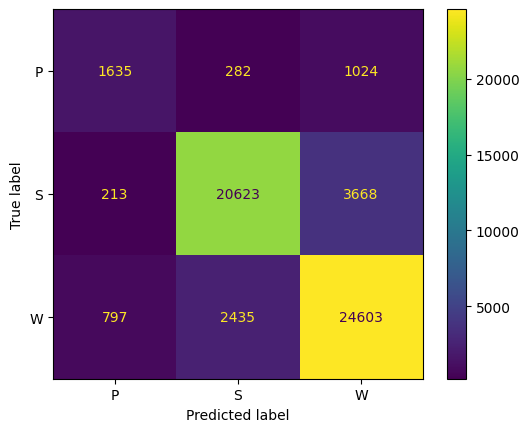

In [13]:
y_pred = np.argmax(model.predict(X_test),axis=1)
# if expert_rule:
#     for i in range(len(y_pred)-2):
#         if y_pred[i] == y_pred[i+2]:
#             y_pred[i+1] = y_pred[i]
cm = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['P','S','W'])
cm.plot()
precision = precision_score(y_pred=y_pred,y_true=y_test,average='macro')
recall = recall_score(y_pred=y_pred,y_true=y_test,average='macro')
f1 = f1_score(y_pred=y_pred,y_true=y_test,average='macro')
print('precision: ',precision)
print('recall: ',recall)
print('f1: ',f1)

In [12]:
import plotly.express as px
fig = px.line(pd.DataFrame([y_test,y_pred]).T)
fig.show(renderer='browser')